In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#plt.rcParams["figure.figsize"]=20,20

In [2]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
    
def elipse(u,v,a,b,c):
    x=a*np.cos(u)*np.sin(v)
    y=b*np.sin(u)*np.sin(v)
    z=c*np.cos(v)
    return np.array([x,y,z])

In [3]:
x=pd.DataFrame()
y=pd.DataFrame()
z=pd.DataFrame()

save_loc = "results/stat_model_20201204_1000_upright"

max_itts = 1000

itts = range(1,max_itts+1)

for itt in itts:
    
    
    """v_x[itt]=tmp["v_x"]
    v_y[itt]=tmp["v_y"]
    v_z[itt]=tmp["v_z"]"""

In [4]:
apogee=pd.DataFrame()

apogee["index"]=z.idxmax()
apogee["alt"]=z.max()

#I know this isn't the proper pandas way todo this but I can't see how todo it right
apogee["x"]=[x[itt][apogee["index"][itt]] for itt in itts]
apogee["y"]=[y[itt][apogee["index"][itt]] for itt in itts]

apogee=apogee.drop("index",axis=1)

In [5]:
landing=pd.DataFrame()

landing["x"]=[x[itt].dropna().iloc[-1] for itt in itts]
landing["y"]=[y[itt].dropna().iloc[-1] for itt in itts]

In [6]:
landing_mu=np.array([landing["x"].mean(),landing["y"].mean()])
landing_stdev=np.array([landing["x"].std(),landing["y"].std()])
landing_cov=landing.cov()

apogee_mu=np.array([apogee["x"].mean(),apogee["y"].mean(),apogee["alt"].mean()])
apogee_stdev=np.array([apogee["x"].std(),apogee["y"].std(),apogee["alt"].std()])
apogee_cov=apogee.cov()

In [7]:
t=np.linspace(0,2*np.pi,314)

l_eig=np.linalg.eig(landing_cov)
l_eig_mat=np.array([[l_eig[1][0][0],l_eig[1][1][0]],[l_eig[1][0][1],l_eig[1][1][1]]])
landing_cov_elipse = np.matmul(l_eig_mat,np.array([l_eig[0][0]**0.5*np.cos(t),l_eig[0][1]**0.5*np.sin(t)]))

Text(0, 0.5, 'East/m')

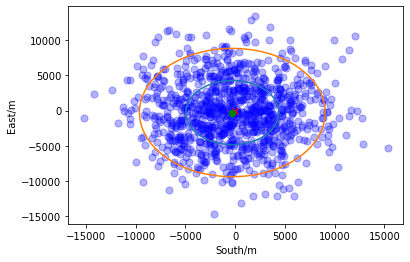

In [8]:
plt.scatter(landing.x,landing.y,marker="o",s=50,color="blue",alpha=0.3)
plt.scatter(0,0,marker="x",color="red")
plt.scatter(landing_mu[0],landing_mu[1],marker="o",s=40,color="green")

plt.plot(landing_cov_elipse[0]+landing_mu[0],landing_cov_elipse[1]+landing_mu[1])
plt.plot(2*landing_cov_elipse[0]+landing_mu[0],2*landing_cov_elipse[1]+landing_mu[1])
plt.xlabel("South/m")
plt.ylabel("East/m")

In [9]:
ap_eig=np.linalg.eig(apogee_cov)
ap_eig_mat=np.array([[ap_eig[1][0][0],ap_eig[1][1][0],ap_eig[1][2][0]],[ap_eig[1][0][1],ap_eig[1][1][1],ap_eig[1][2][1]],[ap_eig[1][0][2],ap_eig[1][1][2],ap_eig[1][2][2]]])

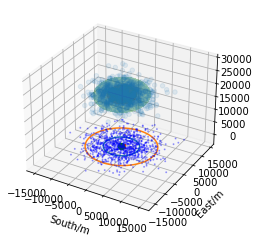

In [10]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(apogee.x,apogee.y,apogee.alt,alpha=.1)

x=[]
y=[]
z=[]

for v in np.linspace(0,np.pi,100):
    for u in np.linspace(0,2*np.pi,200):
        d=elipse(u,v,ap_eig[0][2]**.5,ap_eig[0][1]**.5,ap_eig[0][0]**.5)
        d=np.matmul(ap_eig_mat,d)
        x.append(d[0])
        y.append(d[1])
        z.append(d[2])

ax.plot(apogee_mu[0]+x,apogee_mu[1]+y,apogee_mu[2]+z,color="red",alpha=.5)
ax.plot(apogee_mu[0]+np.array(x)*2,apogee_mu[1]+np.array(y)*2,apogee_mu[2]+np.array(z)*2,color="green",alpha=.3)
ax.scatter(0,0)

ax.scatter(landing.x,landing.y,0,marker="o",s=1,color="blue",alpha=0.3)
ax.scatter(0,0,marker="x",color="red")
ax.scatter(landing_mu[0],landing_mu[1],marker="o",s=40,color="green")

ax.plot(landing_cov_elipse[0]+landing_mu[0],landing_cov_elipse[1]+landing_mu[1])
ax.plot(2*landing_cov_elipse[0]+landing_mu[0],2*landing_cov_elipse[1]+landing_mu[1])
ax.set_xlabel("South/m")
ax.set_ylabel("East/m")

set_axes_equal(ax)